In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

# Задача 1

In [5]:
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

In [6]:
poly = lagrange(x1, y1)
cs = CubicSpline(x1, y1)
pi = PchipInterpolator(x1, y1)
x_1 = np.linspace(np.min(x1), np.max(x1), 1000, endpoint=True)
y_langrange = poly(x_1)
y_cs = cs(x_1)
y_pi = pi(x_1)
y_np = np.polyfit(x1, y1, 15)

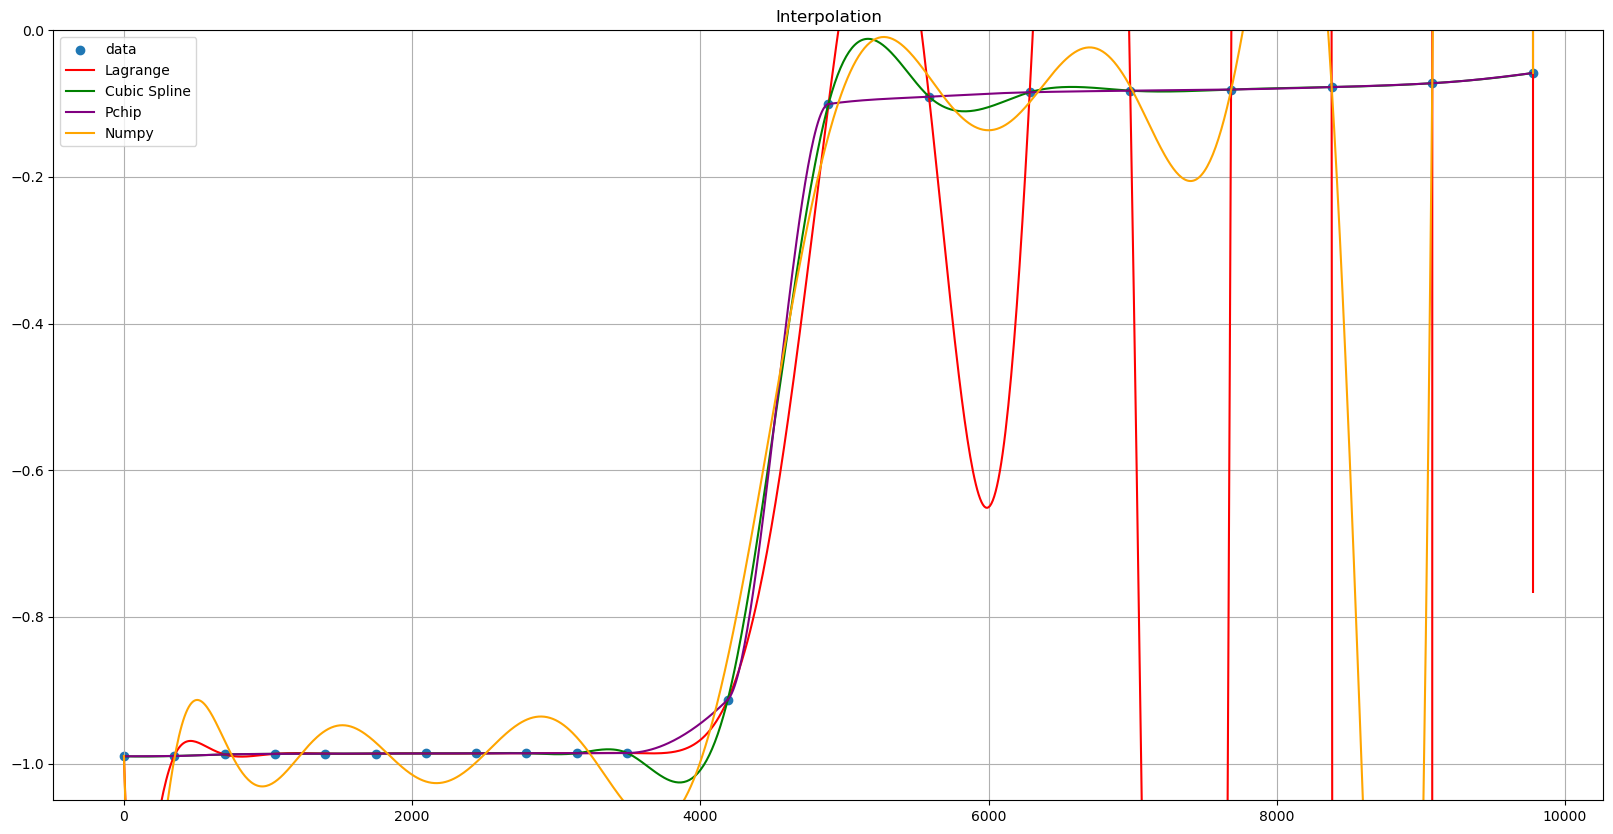

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(x1, y1, label='data')
plt.plot(x_1, y_langrange, label='Lagrange', color = 'red')
plt.plot(x_1, y_cs, label='Cubic Spline', color = 'green')
plt.plot(x_1, y_pi, label='Pchip', color = 'purple')
plt.plot(x_1, np.polyval(y_np, x_1), label='Numpy', color = 'orange')
plt.title('Interpolation')
plt.ylim(-1.05, 0)
plt.legend()
plt.grid()
plt.show()

# Задача 2

In [8]:
class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        X = np.array([[x_n**i for i in range(len(self.xk))]for x_n in self.xk])
        a = np.linalg.solve(X, self.yk)
        # print(np.linalg.norm(np.dot(X, a) - self.yk))
        return sum([a[i]*x**i for i in range(len(a))])

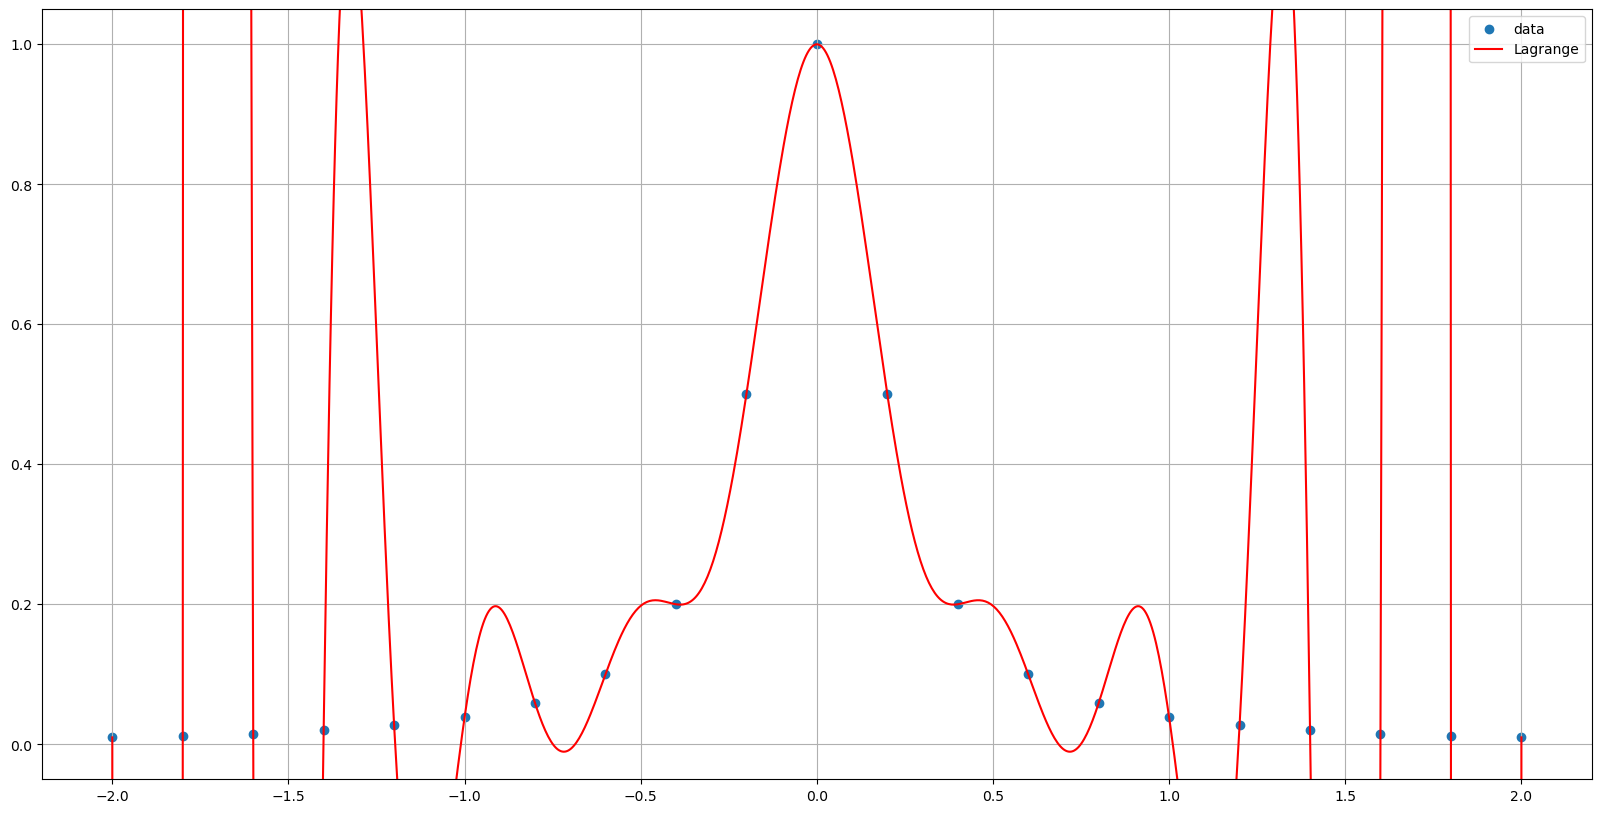

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-14

Mismatched elements: 4 / 21 (19%)
Max absolute difference: 4.04677211e-09
Max relative difference: 1.61020554e-07
 x: array([0.009901, 0.012195, 0.015385, 0.02    , 0.027027, 0.038462,
       0.058824, 0.1     , 0.2     , 0.5     , 1.      , 0.5     ,
       0.2     , 0.1     , 0.058824, 0.038462, 0.027027, 0.02    ,
       0.015385, 0.012195, 0.009901])
 y: array([0.009901, 0.012195, 0.015385, 0.02    , 0.027027, 0.038462,
       0.058824, 0.1     , 0.2     , 0.5     , 1.      , 0.5     ,
       0.2     , 0.1     , 0.058824, 0.038462, 0.027027, 0.02    ,
       0.015385, 0.012195, 0.009901])

In [9]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
x_2 = np.linspace(-2, 2, 1000)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

plt.figure(figsize=(20, 10))
plt.scatter(xx, yy, label='data')
plt.plot(x_2, [lagr(xval) for xval in x_2], label='Lagrange', color = 'red')
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend()
plt.show()

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

# Задача 3

In [ ]:
x_3 = np.linspace(-2, 2, 1000)
y_runge = runge_func(x_3)
y_lagr_3 = LagrangeInterpolator(np.linspace(-2, 2, 3, endpoint=True), runge_func(np.linspace(-2, 2, 3, endpoint=True)))(x_3)
y_lagr_5 = LagrangeInterpolator(np.linspace(-2, 2, 5, endpoint=True), runge_func(np.linspace(-2, 2, 5, endpoint=True)))(x_3)
y_lagr_7 = LagrangeInterpolator(np.linspace(-2, 2, 7, endpoint=True), runge_func(np.linspace(-2, 2, 7, endpoint=True)))(x_3)
y_lagr_11 = LagrangeInterpolator(np.linspace(-2, 2, 11, endpoint=True), runge_func(np.linspace(-2, 2, 11, endpoint=True)))(x_3)

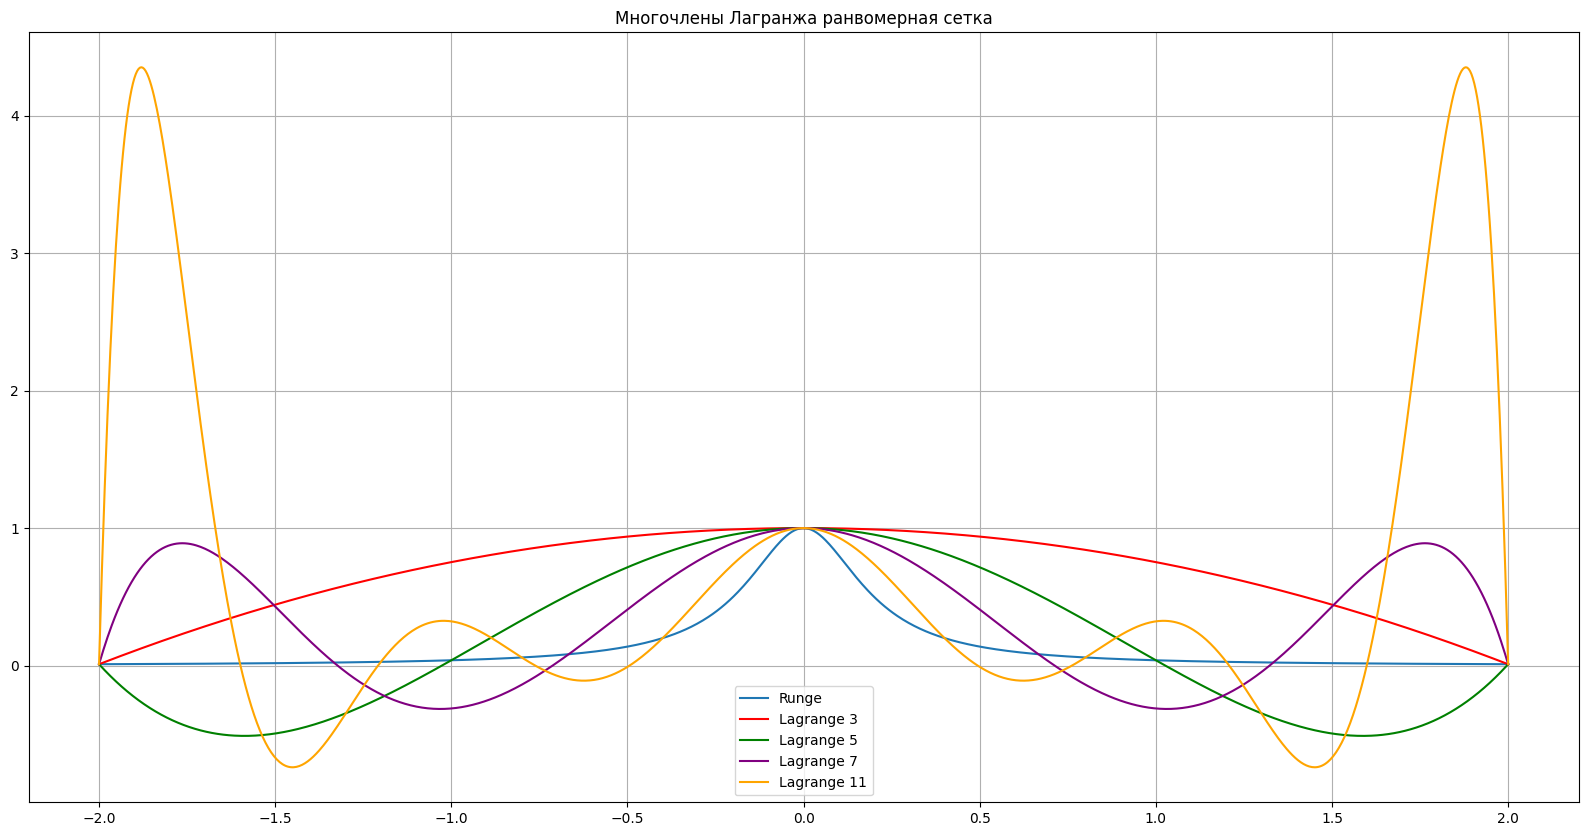

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_3, y_runge, label='Runge')
plt.plot(x_3, y_lagr_3, label='Lagrange 3', color = 'red')
plt.plot(x_3, y_lagr_5, label='Lagrange 5', color = 'green')
plt.plot(x_3, y_lagr_7, label='Lagrange 7', color = 'purple')
plt.plot(x_3, y_lagr_11, label='Lagrange 11', color = 'orange')
# plt.ylim(-0.05, 1.05)
plt.title('Многочлены Лагранжа ранвомерная сетка')
plt.grid()
plt.legend()
plt.show()

In [ ]:
def cheb_nodes(n, a=-2, b=2):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    return 0.5*(a +  b) + 0.5*(b - a) * np.cos((2*np.arange(n, 0, -1) - 1) * np.pi / (2*n))

In [ ]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)


assert_allclose(cheb_nodes(5, -1, 1),
                nodes, atol=1e-4)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

In [ ]:
y_lagr_cheb_3 = LagrangeInterpolator(cheb_nodes(3), runge_func(cheb_nodes(3)))(x_3)
y_lagr_cheb_5 = LagrangeInterpolator(cheb_nodes(5), runge_func(cheb_nodes(5)))(x_3)
y_lagr_cheb_7 = LagrangeInterpolator(cheb_nodes(7), runge_func(cheb_nodes(7)))(x_3)
y_lagr_cheb_11 = LagrangeInterpolator(cheb_nodes(11), runge_func(cheb_nodes(11)))(x_3)

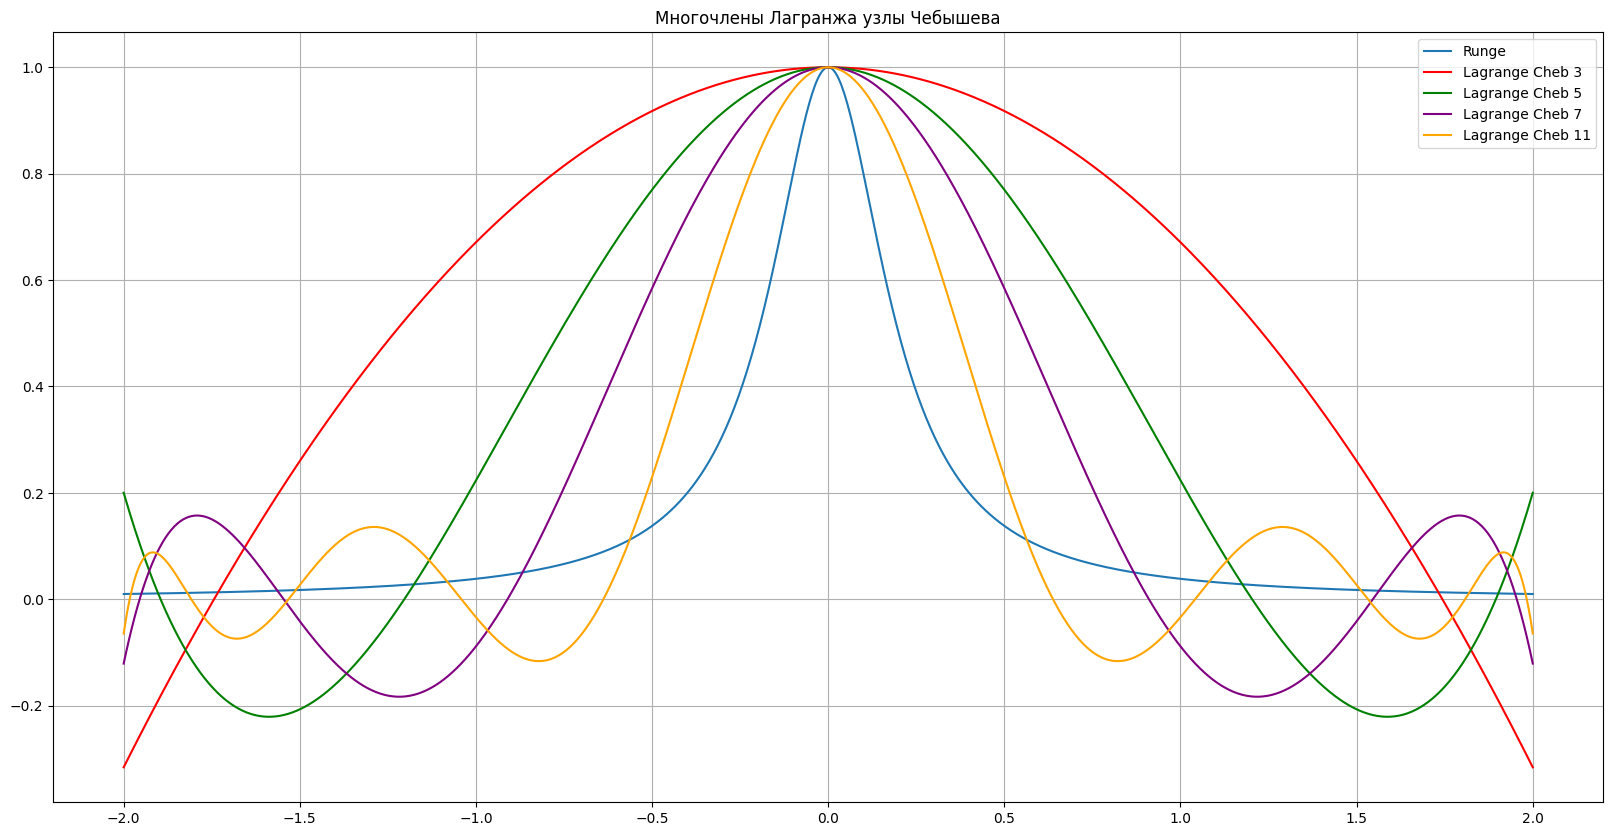

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_3, y_runge, label='Runge')
plt.plot(x_3, y_lagr_cheb_3, label='Lagrange Cheb 3', color = 'red')
plt.plot(x_3, y_lagr_cheb_5, label='Lagrange Cheb 5', color = 'green')
plt.plot(x_3, y_lagr_cheb_7, label='Lagrange Cheb 7', color = 'purple')
plt.plot(x_3, y_lagr_cheb_11, label='Lagrange Cheb 11', color = 'orange')
# plt.ylim(-0.05, 1.05) 
plt.title('Многочлены Лагранжа узлы Чебышева')
plt.grid()
plt.legend()
plt.show()

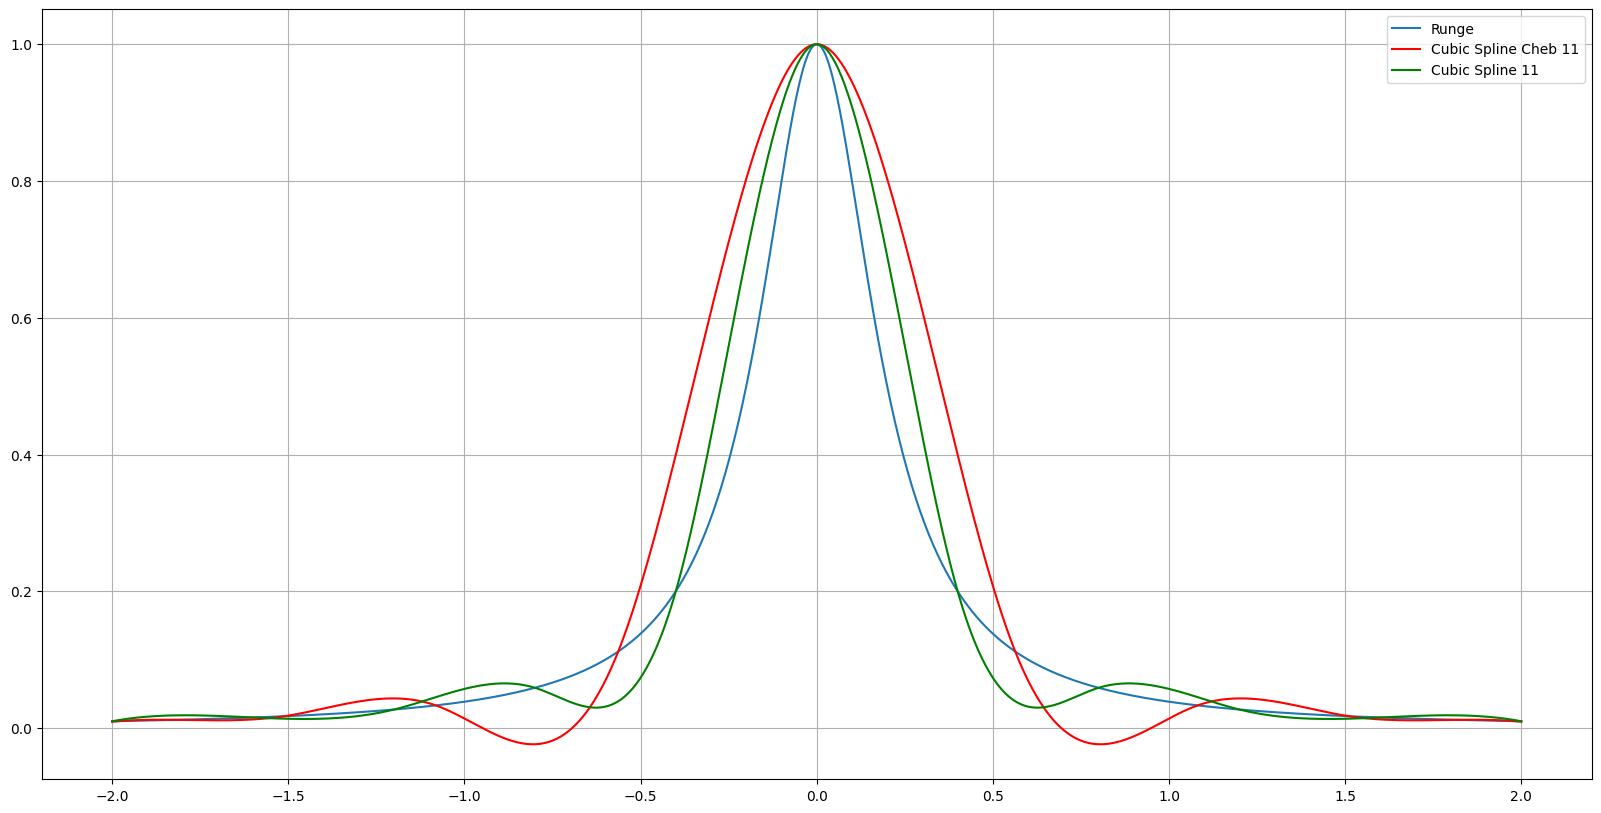

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_3, y_runge, label='Runge')
plt.plot(x_3, CubicSpline(cheb_nodes(11), runge_func(cheb_nodes(11)))(x_3), label='Cubic Spline Cheb 11', color = 'red')
plt.plot(x_3, CubicSpline(np.linspace(-2, 2, 11, endpoint=True), runge_func(np.linspace(-2, 2, 11, endpoint=True)))(x_3), label='Cubic Spline 11', color = 'green')
plt.grid()
plt.legend()
plt.show()

In [ ]:
def another_test(x, eps = 0.21):
    return np.sqrt(eps * (2 + eps))/(2 * np.pi * (1 + eps - np.cos(x)))

x_35 = np.linspace(-1 * np.pi, 1 * np.pi, 1000)
y_an = another_test(x_35)

In [ ]:
y_lagr_3_an = LagrangeInterpolator(np.linspace(-2, 2, 3, endpoint=True), another_test(np.linspace(-2, 2, 3, endpoint=True)))(x_35)
y_lagr_5_an = LagrangeInterpolator(np.linspace(-2, 2, 5, endpoint=True), another_test(np.linspace(-2, 2, 5, endpoint=True)))(x_35)
y_lagr_7_an = LagrangeInterpolator(np.linspace(-2, 2, 7, endpoint=True), another_test(np.linspace(-2, 2, 7, endpoint=True)))(x_35)
y_lagr_11_an = LagrangeInterpolator(np.linspace(-2, 2, 11, endpoint=True), another_test(np.linspace(-2, 2, 11, endpoint=True)))(x_35)

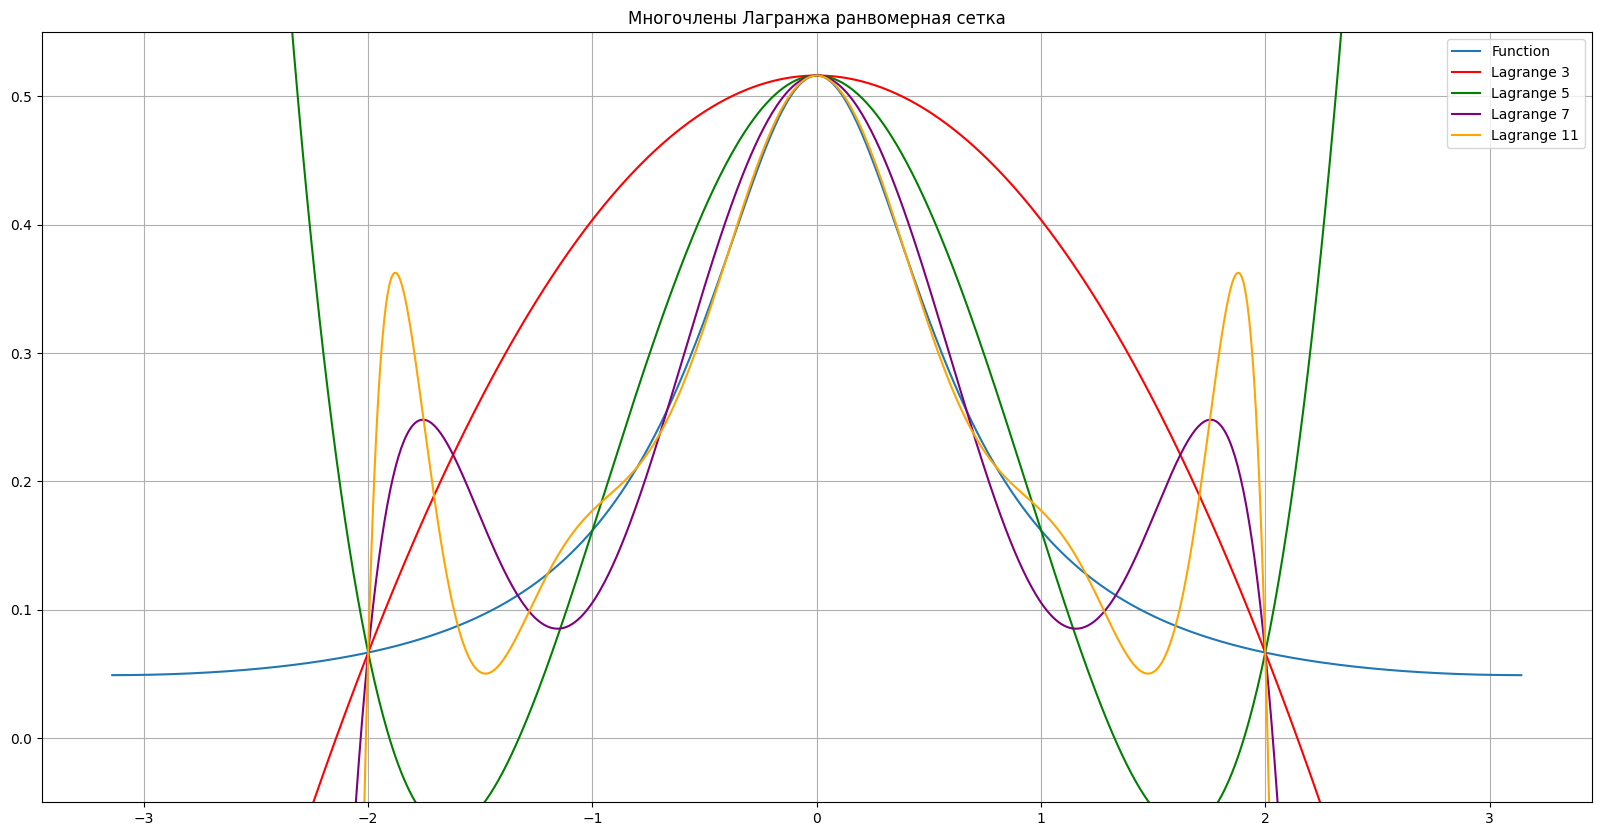

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_35, y_an, label='Function')
plt.plot(x_35, y_lagr_3_an, label='Lagrange 3', color = 'red')
plt.plot(x_35, y_lagr_5_an, label='Lagrange 5', color = 'green')
plt.plot(x_35, y_lagr_7_an, label='Lagrange 7', color = 'purple')
plt.plot(x_35, y_lagr_11_an, label='Lagrange 11', color = 'orange')
plt.ylim(-0.05, 0.55)
plt.title('Многочлены Лагранжа ранвомерная сетка')
plt.grid()
plt.legend()
plt.show()

In [ ]:
y_lagr_cheb_3_an = LagrangeInterpolator(cheb_nodes(3), another_test(cheb_nodes(3)))(x_35)
y_lagr_cheb_5_an = LagrangeInterpolator(cheb_nodes(5), another_test(cheb_nodes(5)))(x_35)
y_lagr_cheb_7_an = LagrangeInterpolator(cheb_nodes(7), another_test(cheb_nodes(7)))(x_35)
y_lagr_cheb_11_an = LagrangeInterpolator(cheb_nodes(11), another_test(cheb_nodes(11)))(x_35)

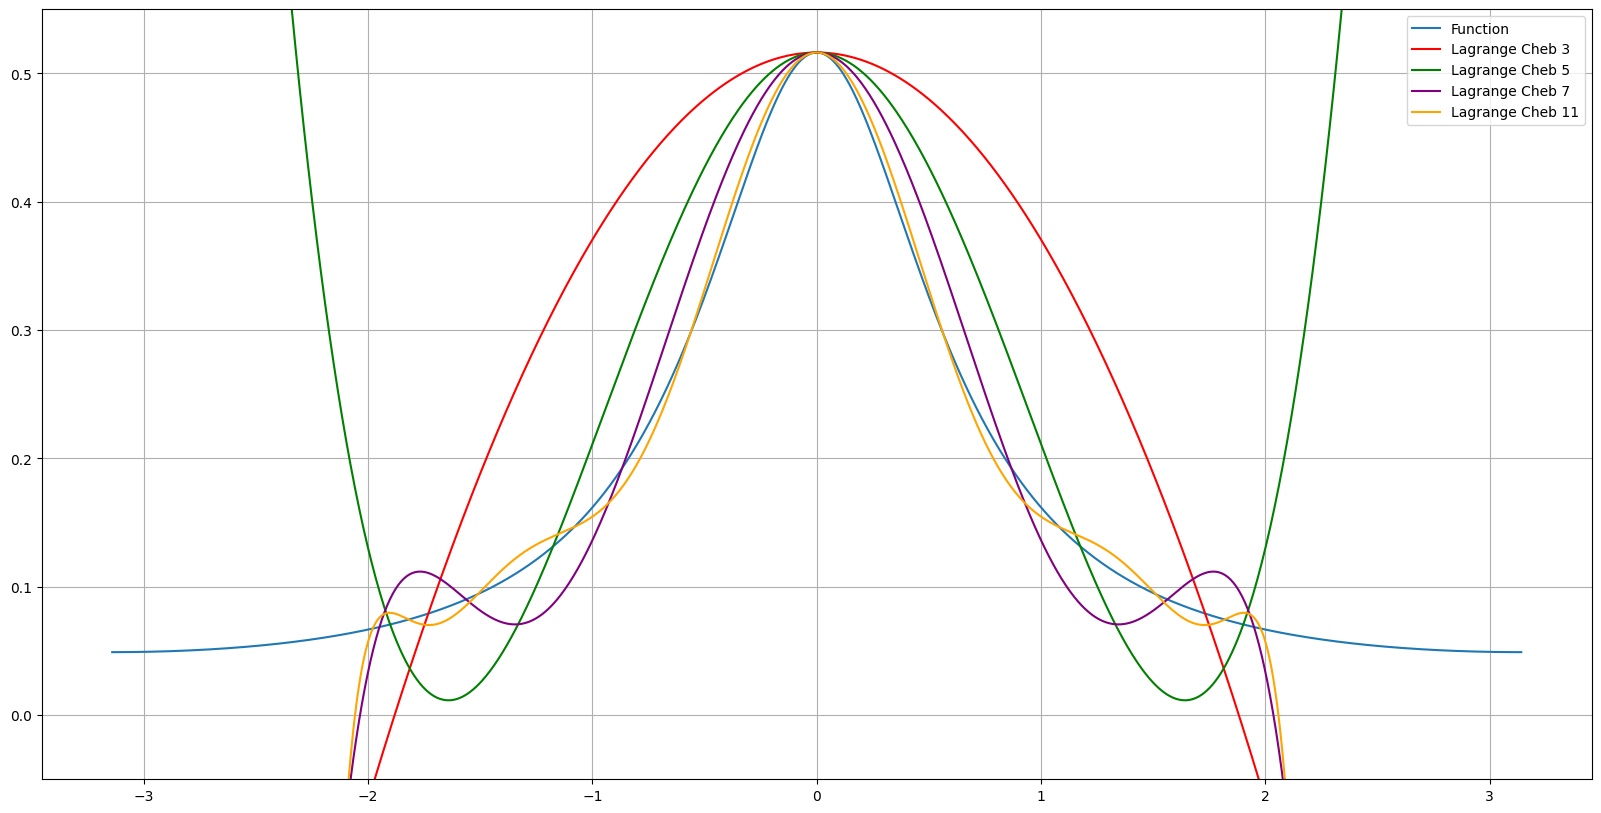

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_35, y_an, label='Function')
plt.plot(x_35, y_lagr_cheb_3_an, label='Lagrange Cheb 3', color = 'red')
plt.plot(x_35, y_lagr_cheb_5_an, label='Lagrange Cheb 5', color = 'green')
plt.plot(x_35, y_lagr_cheb_7_an, label='Lagrange Cheb 7', color = 'purple')
plt.plot(x_35, y_lagr_cheb_11_an, label='Lagrange Cheb 11', color = 'orange')
plt.ylim(-0.05, 0.55) 
plt.grid()
plt.legend()
plt.show()

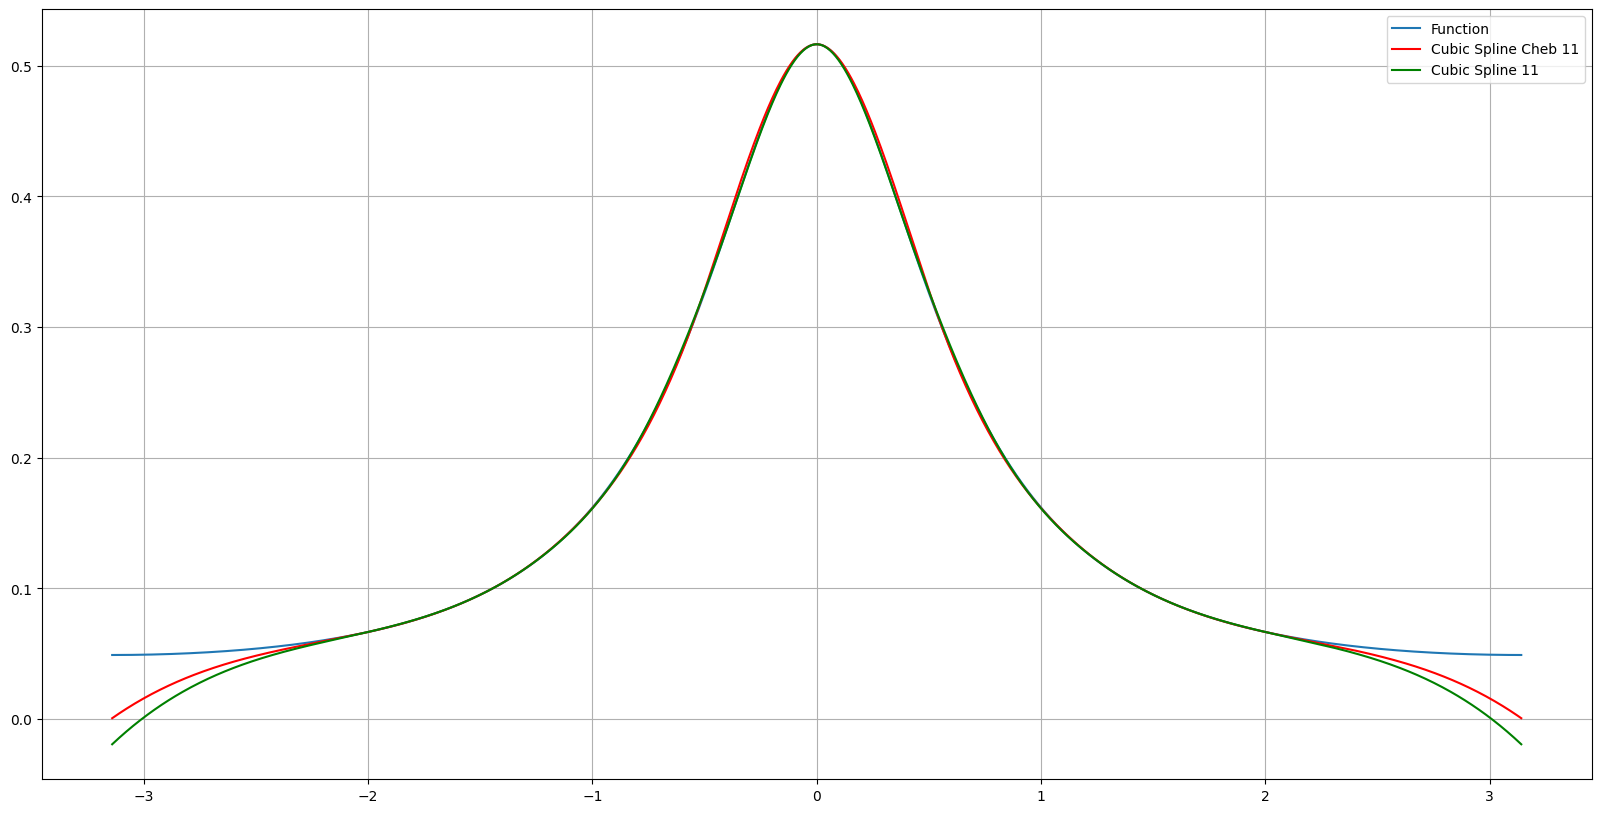

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_35, y_an, label='Function')
plt.plot(x_35, CubicSpline(cheb_nodes(11), another_test(cheb_nodes(11)))(x_35), label='Cubic Spline Cheb 11', color = 'red')
plt.plot(x_35, CubicSpline(np.linspace(-2, 2, 11, endpoint=True), another_test(np.linspace(-2, 2, 11, endpoint=True)))(x_35), label='Cubic Spline 11', color = 'green')
plt.grid()
plt.legend()
plt.show()

# Задача 4

"Recommended values of s depend on the weights, w. If the weights represent the inverse of the standard-deviation of y, then a good s value should be found in the range (m-sqrt(2*m),m+sqrt(2*m)) where m is the number of datapoints in x, y, and w. "

Веса логично выдававть обратно пропорционально шуму. Чем больше ошибка точки, тем меньше у нее вес, то есть оптимальный s лежит в диапозоне $(m - \sqrt{2\cdot m}, \ m + \sqrt{2 \cdot m)}$

In [ ]:
from scipy.interpolate import UnivariateSpline

np.random.seed(0)
x = np.linspace(0, 10, 50)
y_clear = np.sin(x) 
y = 2 * np.sin(x) + 0.5 * np.random.randn(len(x))

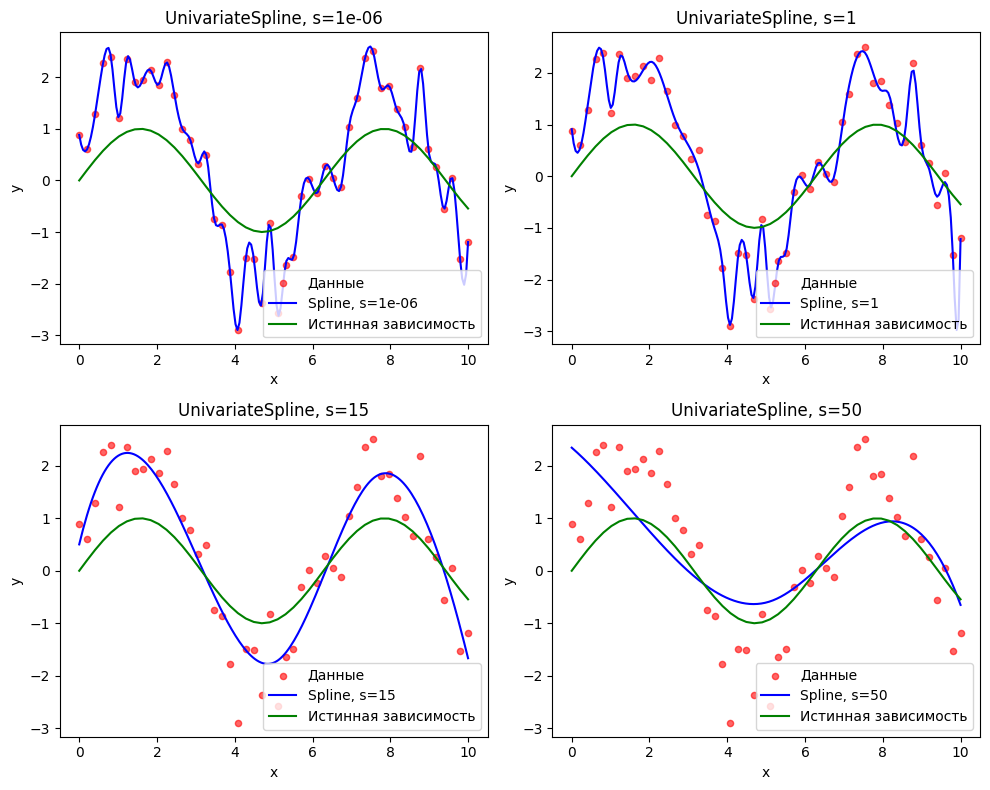

In [ ]:
# Четыре разных значения параметра s (сильная недофит -> сильная переобученность)
s_values = [1e-6, 1, 15, 50]  # s=1e-6 - "слишком маленький", s=10 - "слишком большой", два других "где-то посередине"

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()  # Раскладываем двумерный массив осей в один

for i, s in enumerate(s_values):
    spline = UnivariateSpline(x, y, s=s)
    
    # Рисуем исходные точки
    axes[i].scatter(x, y, label='Данные', color='red', s=20, alpha=0.6)
    
    # Рисуем аппроксимирующую кривую
    xs = np.linspace(0, 10, 200)
    ys = spline(xs)
    axes[i].plot(xs, ys, label=f'Spline, s={s}', color='blue')
    axes[i].plot(x, y_clear, label='Истинная зависимость', color='green')

    axes[i].set_title(f'UnivariateSpline, s={s}')
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.tight_layout()
plt.show()

# Задача 5

$f = \dfrac{200}{1 + \dfrac{t}{200}} \cdot (0.5 + 0.5 \cos(0.04 t))$

$|f'''(t)| < 0.005  \ t \in (0, 1000)$

$\Delta f \approx |f'(t)| \Delta t < 5 \ t \in (0,1000)$

$h_{opt} = \sqrt[3]{\dfrac{3 \Delta f}{M_3}} \approx 15
$

In [ ]:
def func(t):
    return  200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(1)


t = np.linspace(0, 1000, 1000)
u = func(t)

In [ ]:
grad_1 = np.gradient(u, t)

In [ ]:
def diff2(f, t0, h):
    return (f(t0 + h) - f(t0 - h)) / (2 * h)

h_opt = 15

grad_2 = np.array([diff2(func, t0, h_opt) for t0 in t[16:-16]])

In [ ]:
sp = UnivariateSpline(t, u, s=500)
grad_sp = sp.derivative(n=1)(t)

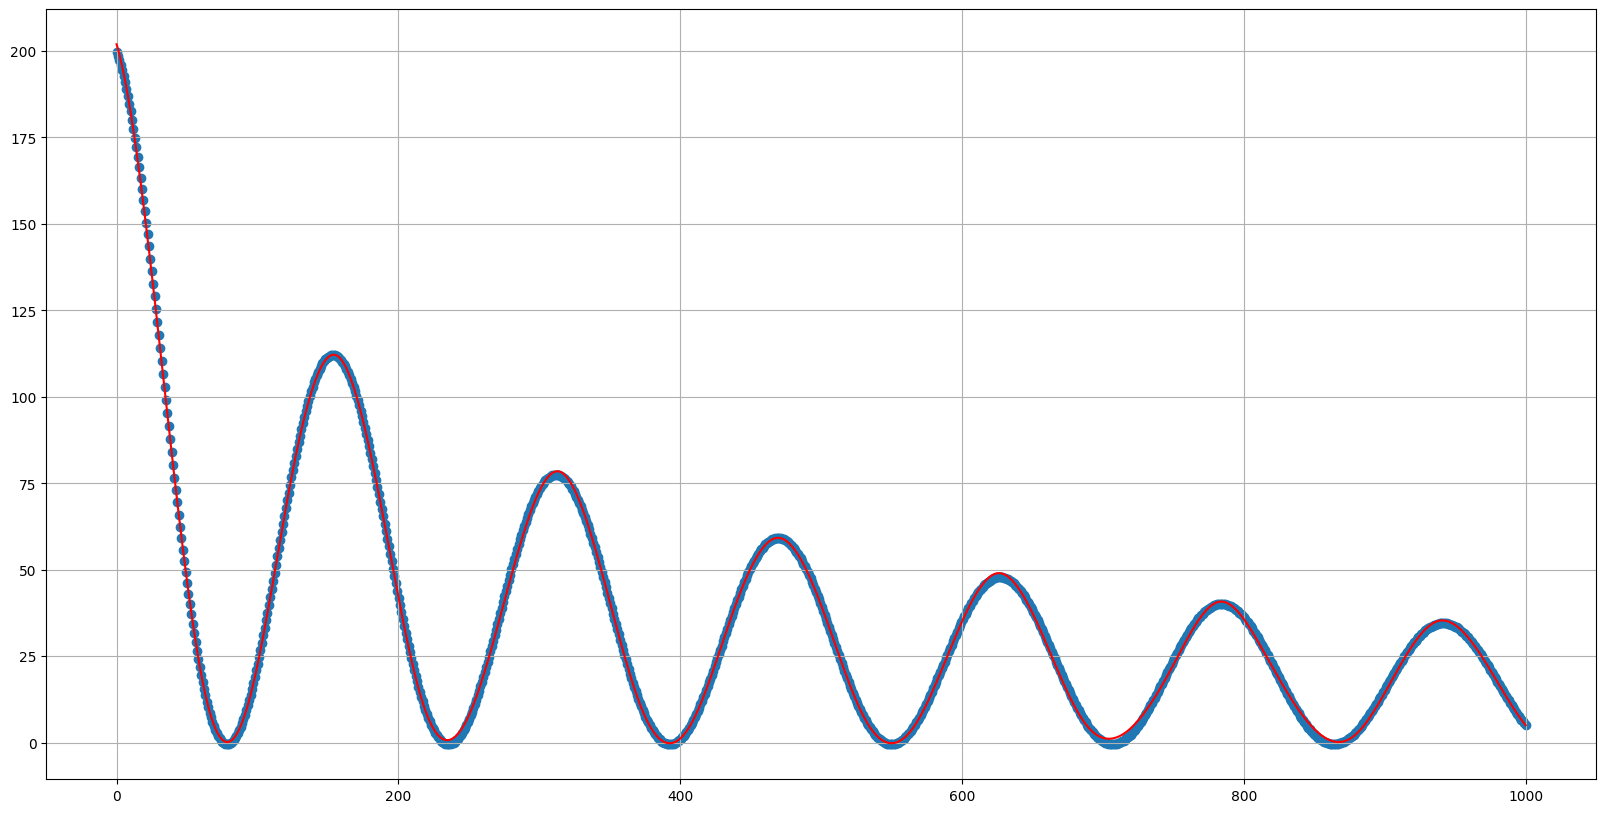

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(t, u, label='data')
plt.plot(t, sp(t), label='spline', color = 'red')
plt.grid()
plt.show()

In [ ]:
def analytic_grad(t):
    return -0.04 * 200 * np.sin(0.04 * t) * (t / 200 + 1)**(-2) + 0.04 * np.cos(0.04 * t) * 200 / (t + 200)**2

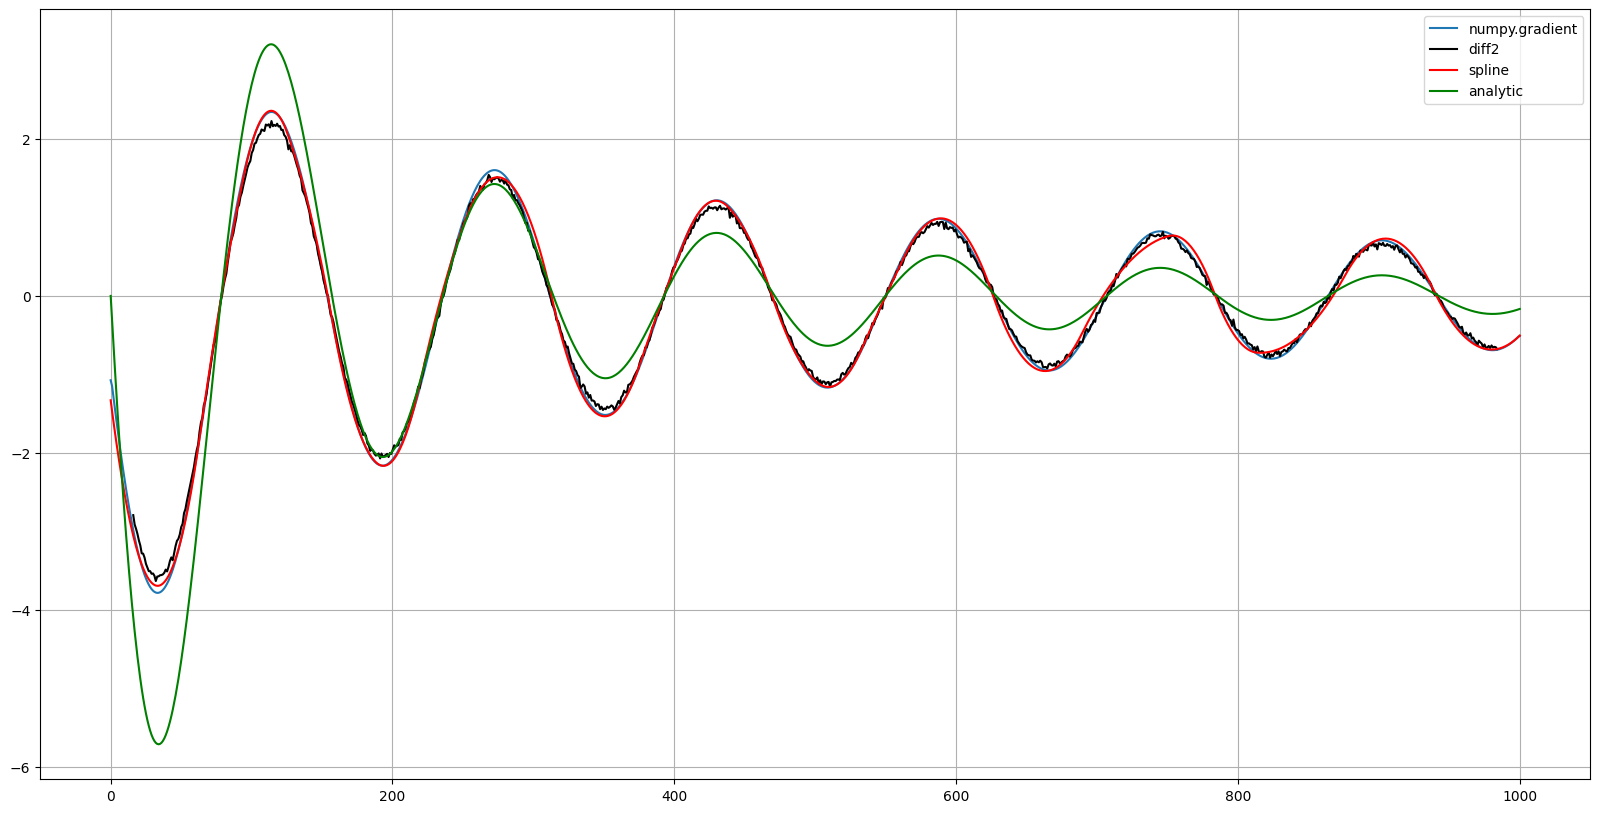

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(t, grad_1, label='numpy.gradient')
plt.plot(t[16:-16], grad_2, label='diff2', color = 'black')
plt.plot(t, grad_sp, label='spline', color = 'red')
plt.plot(t, analytic_grad(t), label='analytic', color = 'green')
plt.grid()
plt.legend()
plt.show()

In [ ]:
print('норма разности для тупой производной = ' , np.linalg.norm(grad_1 - analytic_grad(t)))
print('норма разности для производной с оптимальным шагом = ' , np.linalg.norm(grad_2.reshape(968) - analytic_grad(t[16:-16])))
print('норма разности для производной сплайна = ' , np.linalg.norm(grad_sp - analytic_grad(t)))

норма разности для тупой производной =  15.80523514993526
норма разности для производной с оптимальным шагом =  16.1286095458401
норма разности для производной сплайна =  16.054336530897512
